# Project: Wrangling and Analyzing Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering data</a></li>
<li><a href="#assess">Assessing data</a></li>
<li><a href="#clean">Cleaning data</a></li>
    <ul>
        <li><a href="#quality">Quality</a></li>
        <li><a href="#tidy">Tidiness</a></li>
    </ul>
<li><a href="#analysis">Storing, Analyzing, and Visualizing Data</a></li>
    <ul>
        <li><a href="#insight1">Insight 1</a></li>
        <li><a href="#insight2">Insight 2</a></li>
        <li><a href="#insight3">Insight 3</a></li>
    </ul>
</ul>

<a id='intro'></a>
## Introduction

In this data wrangling project I will gather, assess and clean twitter posts from Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. This project will download 5000+ of their tweets as they stood on August 1, 2017

## Data Gathering

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [69]:
# Import statements for packages used in project
import numpy as np
import pandas as pd
import json
import requests
import tweepy
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read csv file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

#viewing first 5 lines of the csv file
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Download the image prediction file using the link provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [6]:
# Showing the data in the image predictions file
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
# Configure Twitter API authentication
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
# Read tweets via Twitter API
tweets = []

for tweet in df_archive['tweet_id']:
    try:
        tweets.append(api.get_status(tweet))
    except tweepy.TweepError as e:
        print('Unable to load data for tweet id:', tweet, 'Reason:', e.args[0][0]['message'])

Unable to load data for tweet id: 888202515573088257 Reason: No status found with that ID.
Unable to load data for tweet id: 873697596434513921 Reason: No status found with that ID.
Unable to load data for tweet id: 872668790621863937 Reason: No status found with that ID.
Unable to load data for tweet id: 872261713294495745 Reason: No status found with that ID.
Unable to load data for tweet id: 869988702071779329 Reason: No status found with that ID.
Unable to load data for tweet id: 866816280283807744 Reason: No status found with that ID.
Unable to load data for tweet id: 861769973181624320 Reason: No status found with that ID.
Unable to load data for tweet id: 856602993587888130 Reason: No status found with that ID.
Unable to load data for tweet id: 856330835276025856 Reason: No status found with that ID.
Unable to load data for tweet id: 851953902622658560 Reason: No status found with that ID.
Unable to load data for tweet id: 851861385021730816 Reason: No status found with that ID.

In [6]:
# Display the number of tweets downloaded
print('Number of tweets successfully downloaded: ', len(tweets))

Number of tweets successfully downloaded:  2327


In [ ]:
# Store the tweet JSON data in a list and save the list to tweet_json.txt
# https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
tweet_json = []
for tweet in tweets:
    tweet_json.append(tweet._json)

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweet_json, indent=4))

In [ ]:
# Read the tweet_json.txt data into a Pandas DataFrame
# https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

tweet_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    data_json = json.load(json_file)
    for each_tweet in data_json:
        tweet_id = each_tweet['id']
        whole_tweet = each_tweet['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_tweet['favorite_count']
        retweet_count = each_tweet['retweet_count']
        created_at = each_tweet['created_at']
        whole_source = each_tweet['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_tweet['retweeted_status'] = each_tweet.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        tweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [10]:
# View the info of the tweet_json DataFrame
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
tweet_id            2327 non-null object
favorite_count      2327 non-null int64
retweet_count       2327 non-null int64
created_at          2327 non-null object
source              2327 non-null object
retweeted_status    2327 non-null object
url                 2327 non-null object
dtypes: int64(2), object(5)
memory usage: 127.3+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
# Visual assessment of the archive DataFrame
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# Visual assessment of the prediction DataFrame
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
# Visual assessment of the tweet_json
tweet_json

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,33639,6961,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29181,5267,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,21950,3463,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,36714,7175,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35102,7706,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,17707,2580,Sat Jul 29 00:08:17 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10306,1644,Fri Jul 28 16:27:12 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,56546,15664,Fri Jul 28 00:22:40 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,24387,3599,Thu Jul 27 16:25:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,27802,6059,Wed Jul 26 15:59:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [16]:
# View the source values
df_archive.source.sort_values()

2273    <a href="http://twitter.com" rel="nofollow">Tw...
352     <a href="http://twitter.com" rel="nofollow">Tw...
375     <a href="http://twitter.com" rel="nofollow">Tw...
798     <a href="http://twitter.com" rel="nofollow">Tw...
2275    <a href="http://twitter.com" rel="nofollow">Tw...
2274    <a href="http://twitter.com" rel="nofollow">Tw...
2272    <a href="http://twitter.com" rel="nofollow">Tw...
2271    <a href="http://twitter.com" rel="nofollow">Tw...
2270    <a href="http://twitter.com" rel="nofollow">Tw...
2269    <a href="http://twitter.com" rel="nofollow">Tw...
2268    <a href="http://twitter.com" rel="nofollow">Tw...
2267    <a href="http://twitter.com" rel="nofollow">Tw...
2266    <a href="http://twitter.com" rel="nofollow">Tw...
2265    <a href="http://twitter.com" rel="nofollow">Tw...
2264    <a href="http://twitter.com" rel="nofollow">Tw...
2263    <a href="http://twitter.com" rel="nofollow">Tw...
2262    <a href="http://twitter.com" rel="nofollow">Tw...
2261    <a hre

In [19]:
# Check for any duplicated tweets in archive table
len(df_archive[df_archive.tweet_id.duplicated()])

0

In [20]:
# Sort the names to see any case differences
df_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [22]:
# Check archive table for any null numerator values
sum(df_archive.rating_numerator.isnull())

0

In [24]:
# Check archive table for any null denominator values
sum(df_archive.rating_denominator.isnull())

0

In [25]:
# Check prediction table for any duplicated images
len(df_image_predictions[df_image_predictions.jpg_url.duplicated()])

66

In [26]:
# Check how many tweets are retweets
tweet_json.retweeted_status.value_counts()

Original tweet       2167
This is a retweet     160
Name: retweeted_status, dtype: int64

### Quality
#### `archive` table
- Some name column entries are not names
- Remove HTML from rows in source column
- Remove non-null values in retweeted_status_id column

#### `prediction` table
- Remove entries that have p1_dog, p2_dog, & p3_dog values set to false. These are not dogs of any kind.
- Remove duplicate jpg_url entries

#### `tweet_json` table
- Tweet ID 886267009285017600 does not have a valid URL
- Remove rows with retweets

#### All tables
- Convert data type of tweet_id to object string data type for merging

### Tidiness
- Combine the 4 dog stage columns into a single column in the archive table
- Join archive, predictions and tweet_json tables

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
# Create copies of the original DataFrames
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1:

#### table `archive`:  Invalid dog names

#### Define:
- Remove entries in the name column that are lower case. 

#### Code

In [28]:
# Drop any remaining rows that contain NaN in the name column
df_archive_clean.dropna(subset=['name'], inplace=True)

In [30]:
# Drop any remaining rows that contain NaN in the name column
df_archive_clean.dropna(subset=['name'], inplace=True)

In [32]:
# Drop any remaining rows that contain None in the name column
df_archive_clean = df_archive_clean[df_archive_clean.name != 'None']

#### Test

In [33]:
df_archive_clean['name'].value_counts()

a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Sadie        8
the          8
Toby         7
an           7
Bailey       7
Daisy        7
Buddy        7
Rusty        6
Jax          6
Dave         6
Bella        6
Koda         6
Leo          6
Jack         6
Scout        6
Stanley      6
Oscar        6
Milo         6
George       5
Bentley      5
            ..
this         1
Kellogg      1
Hermione     1
Rooney       1
Carbon       1
Patch        1
Ginger       1
Andru        1
Obie         1
Juckson      1
Oreo         1
Pinot        1
Peanut       1
Corey        1
Kanu         1
Asher        1
Dietrich     1
Tonks        1
Mya          1
Rupert       1
Mingus       1
Gabby        1
Chadrick     1
Tobi         1
Sid          1
Gert         1
Nida         1
Mason        1
Craig        1
Tango        1
Name: name, Length: 956, dtype: int64

### Issue #2:

#### table `archive`:  HTML tags in source column


#### Define

- Remove HTML from rows in source column

#### Code

In [35]:
# Remove HTML from rows in source column
df_archive_clean['source'] = df_archive_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_archive_clean['source'] = df_archive_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df_archive_clean['source'] = df_archive_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_archive_clean['source'] = df_archive_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [36]:
#Verify that HTML from rows in source column have been removed
df_archive_clean.source.value_counts()

Twitter for iPhone    1536
Vine                    45
Twitter Web Client      20
TweetDeck               10
Name: source, dtype: int64

### Issue #3:

#### table `archive`: non-null values in retweeted_status_id column

#### Define:
- Remove non-null values in retweeted_status_id column

#### Code

In [38]:
# Remove rows that have values in the retweeted_status_id column
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

In [39]:
# Drop empty retweeted_status columns and associated in_reply columns
df_archive_clean = df_archive_clean.drop(['retweeted_status_id', 
                                    'retweeted_status_user_id',  
                                    'retweeted_status_timestamp',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis=1)

#### Test

In [40]:
# Verify no values in the retweeted columns
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 2354
Data columns (total 12 columns):
tweet_id              1495 non-null int64
timestamp             1495 non-null object
source                1495 non-null object
text                  1495 non-null object
expanded_urls         1495 non-null object
rating_numerator      1495 non-null int64
rating_denominator    1495 non-null int64
name                  1495 non-null object
doggo                 1495 non-null object
floofer               1495 non-null object
pupper                1495 non-null object
puppo                 1495 non-null object
dtypes: int64(3), object(9)
memory usage: 151.8+ KB


### Issue #4:

#### table `image prediction`: Remove entries that have False p1_dog, p2_dog, & p3_dog values

#### Define
- Drop rows with entries that have False p1_dog, p2_dog, & p3_dog values

#### Code

In [41]:
# Only keep rows with entries that have p1_dog, p2_dog, & p3_dog values set to True
df_image_predictions_clean = df_image_predictions_clean[((df_image_predictions_clean['p1_dog'] == True) & 
                  (df_image_predictions_clean['p2_dog'] == True) & 
                  (df_image_predictions_clean['p3_dog'] == True))]

#### Test

In [42]:
# Verify that entries with p1_dog, p2_dog, & p3_dog set to False have been removed
df_image_predictions_clean[((df_image_predictions_clean['p1_dog'] == False) & 
                  (df_image_predictions_clean['p2_dog'] == False) & 
                  (df_image_predictions_clean['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #5:

#### table `image prediction`: duplicates in the jpg_url column

#### Define
- Drops rows with duplicates in the jpg_url column

#### Code

In [43]:
# Drop all rows with duplicate addresses for jpg_url
df_image_predictions_clean = df_image_predictions_clean.drop_duplicates(subset='jpg_url')

#### Test

In [44]:
# Verify that there are no longer duplicate entries for jpg_url
len(df_image_predictions_clean[df_image_predictions_clean.jpg_url.duplicated()])

0

### Issue #6:

#### table `image predictions`:  Remove img_num column

#### Define
- Drop img_num column

#### Code

In [45]:
# Drop img_num column
df_image_predictions_clean = df_image_predictions_clean.drop(['img_num'], axis=1)

#### Test

In [46]:
# Verify img_num column has been dropped
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1206 non-null int64
jpg_url     1206 non-null object
p1          1206 non-null object
p1_conf     1206 non-null float64
p1_dog      1206 non-null bool
p2          1206 non-null object
p2_conf     1206 non-null float64
p2_dog      1206 non-null bool
p3          1206 non-null object
p3_conf     1206 non-null float64
p3_dog      1206 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 88.3+ KB


### Issue #7:

#### `tweet_json`: Remove retweets

#### Define
- Remove rows with retweets

#### Code

In [47]:
# Keep only original tweets
tweet_json_clean = tweet_json_clean[tweet_json_clean.retweeted_status == 'Original tweet']

#### Test

In [48]:
# Verify that only original tweets remain
tweet_json_clean.retweeted_status.value_counts()

Original tweet    2167
Name: retweeted_status, dtype: int64

### Issue #8:

#### table `tweet_json`:  Change data type of tweet_id in all tables to object string data type

#### Define
- Convert data type of tweet_id in all tables to object string data type for merging

#### Code

In [50]:
# Convert data type of tweet_id in all tables to object string data type for merging
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(str)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)

#### Test

In [51]:
# Verify data type of tweet_id
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2326
Data columns (total 7 columns):
tweet_id            2167 non-null object
favorite_count      2167 non-null int64
retweet_count       2167 non-null int64
created_at          2167 non-null object
source              2167 non-null object
retweeted_status    2167 non-null object
url                 2167 non-null object
dtypes: int64(2), object(5)
memory usage: 135.4+ KB


<a id='tidy'></a>
### Tidiness 1

#### Define
- Combine the 4 dog stage columns into a single column in the archive table

#### Code

In [52]:
# Extract the dog stage names from the the 4 individual columns and combine into one 'stage' column
# https://stackoverflow.com/questions/44061607/pandas-lambda-function-with-nan-support

stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    df_archive_clean[stage] = df_archive_clean[stage].apply(lambda x: np.NaN if x == 'None' else x)
    
df_archive_clean['stage'] = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
df_archive_clean['stage'] = df_archive_clean['stage'].apply(lambda x: x.replace('nan', ''))
df_archive_clean['stage'] = df_archive_clean['stage'].apply(lambda x: np.NaN if x == '' else x)

df_archive_clean['stage'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [53]:
# Drop individual dog stage columns
cols_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_clean.drop(cols_to_drop, axis=1, inplace=True)

#### Test

In [54]:
# Verify that the 4 dog stage columns have merged into a single dog_stage column
# archive_clean.info()
# View the value counts for the new stage column
df_archive_clean['stage'].value_counts()

pupper          132
doggo            40
puppo            16
floofer           5
doggo pupper      5
Name: stage, dtype: int64

### Tidiness 2

#### Define
- Combine the archive, prediction and tweet_json table into a single dataframe

#### Code

In [55]:
# Merge the archive and prediction tables into a single data frame
Merged_archive = pd.merge(df_archive_clean, df_image_predictions_clean, on='tweet_id')
# Merge the tweet_json table into the combined_archive data frame
Merged_archive = pd.merge(Merged_archive, tweet_json_clean, on='tweet_id')

#### Test

In [56]:
# Verify the structure of the new combined dataframe
Merged_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 25 columns):
tweet_id              900 non-null object
timestamp             900 non-null object
source_x              900 non-null object
text                  900 non-null object
expanded_urls         900 non-null object
rating_numerator      900 non-null int64
rating_denominator    900 non-null int64
name                  900 non-null object
stage                 117 non-null object
jpg_url               900 non-null object
p1                    900 non-null object
p1_conf               900 non-null float64
p1_dog                900 non-null bool
p2                    900 non-null object
p2_conf               900 non-null float64
p2_dog                900 non-null bool
p3                    900 non-null object
p3_conf               900 non-null float64
p3_dog                900 non-null bool
favorite_count        900 non-null int64
retweet_count         900 non-null int64
created_at          

In [57]:
# Visually assess the combined dataframe for any inconsistencies
Merged_archive.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,source_y,retweeted_status,url
0,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,papillon,0.068957,True,29181,5267,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
1,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,kelpie,0.031379,True,21950,3463,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
2,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,German_short-haired_pointer,0.175219,True,35102,7706,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
3,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Chesapeake_Bay_retriever,0.118184,True,24387,3599,Thu Jul 27 16:25:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
4,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,Chihuahua,0.029248,True,27802,6059,Wed Jul 26 15:59:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
# Store the combined_archive DataFrame in a CSV file
Merged_archive.to_csv('twitter_archive_master.csv', 
                         index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

<a id='insight1'></a>
#### Insight 1
- The most common dog name is Cooper

In [59]:
# Find the total occurrences of each dog name in the cleaned combined_archive dataframe
Merged_archive.name.value_counts()

a            32
Cooper        9
Oliver        7
Charlie       7
Koda          6
the           6
Sadie         6
Leo           5
Toby          5
Bo            5
Winston       5
Tucker        5
Scooter       4
Gus           4
Bear          4
Oscar         4
Maggie        4
Lucy          4
Stanley       4
Dave          4
Daisy         4
Finn          4
Larry         4
Sophie        4
Bentley       3
Dexter        3
Brody         3
Winnie        3
Bella         3
Rusty         3
             ..
Rodney        1
Lupe          1
Kara          1
Puff          1
Monster       1
Karll         1
Kollin        1
Ebby          1
Shelby        1
Aqua          1
Pablo         1
Rolf          1
Naphaniel     1
Dewey         1
Butters       1
Snoopy        1
Duddles       1
Adele         1
Harlso        1
Sky           1
Pilot         1
Dudley        1
Belle         1
Shadoe        1
Kyro          1
Augie         1
Jeb           1
Dylan         1
Clarq         1
Neptune       1
Name: name, Length: 644,

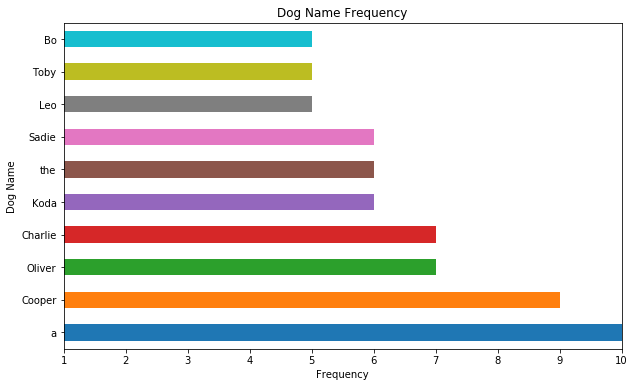

In [60]:
# Plot the top 10 Dog names by frequency
plt.figure(figsize=(10, 6))
dog_names = Merged_archive.name.value_counts().nlargest(10).plot(kind = 'barh');
dog_names.set_title('Dog Name Frequency');
dog_names.set_xlabel('Frequency');
dog_names.set_ylabel('Dog Name');
dog_names.set_xlim(1, 10);

<a id='insight2'></a>
#### Insight 2
- The mean rating numerator is 11. Most dogs have a rating numerator between 10 & 12. The clumber has the highest mean rating numerator at 27.

In [61]:
# View summary data for the rating numerator in the cleaned combined_archive dataframe
Merged_archive.rating_numerator.describe()

count    900.000000
mean      11.041111
std        2.773119
min        1.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       60.000000
Name: rating_numerator, dtype: float64

In [62]:
# Find the dog breed with the highest numerator
Merged_archive.groupby('p1')['rating_numerator'].mean().nlargest(10)

p1
clumber                27.000000
Great_Pyrenees         16.888889
Siberian_husky         13.647059
Bedlington_terrier     13.500000
Irish_setter           13.000000
Border_terrier         12.333333
Saluki                 12.333333
Gordon_setter          12.000000
Irish_water_spaniel    12.000000
Tibetan_mastiff        12.000000
Name: rating_numerator, dtype: float64

<a id='insight3'></a>
#### Insight 3
- The most frequent dog breed first prediction for a given dog is golden retriever follower by labrador retriever in the second and third predictions. The prediction algorithm has a 63% confidence for the first prediction followed by 14% for the second prediction and only 6% for the third prediction.

In [63]:
# Top 10 most frequent p1 dog breed predictions 
Merged_archive.p1.value_counts().nlargest(10)

golden_retriever      81
Pembroke              60
Labrador_retriever    50
Chihuahua             38
pug                   28
toy_poodle            21
Pomeranian            21
malamute              20
chow                  20
Siberian_husky        17
Name: p1, dtype: int64

In [64]:
# Find the mean confidence of the p1 predictions
Merged_archive.p1_conf.mean()

0.62727727888888896

In [65]:
# Top 10 most frequent p2 dog breed predictions 
Merged_archive.p2.value_counts().nlargest(10)

Labrador_retriever          49
Cardigan                    47
golden_retriever            39
Chihuahua                   22
miniature_poodle            22
French_bulldog              22
Chesapeake_Bay_retriever    21
collie                      21
beagle                      20
toy_poodle                  20
Name: p2, dtype: int64

In [66]:
# Find the mean confidence of the p2 predictions
Merged_archive.p2_conf.mean()

0.14212823512622225

In [67]:
# Top 10 most frequent p3 dog breed predictions 
Merged_archive.p3.value_counts().nlargest(10)

Labrador_retriever           47
Chihuahua                    38
kelpie                       25
Eskimo_dog                   23
golden_retriever             22
cocker_spaniel               20
Pekinese                     20
Staffordshire_bullterrier    19
malamute                     19
beagle                       19
Name: p3, dtype: int64

In [68]:
# Find the mean confidence of the p3 predictions
Merged_archive.p3_conf.mean()

0.061991286753666663